<a href="https://colab.research.google.com/github/Himalaypatel75/Tenserflow-Keras/blob/main/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
%%capture
!pip install tensorflow

In [52]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [53]:
from sklearn.datasets import load_breast_cancer

In [54]:
data = load_breast_cancer()

In [55]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [57]:
data.data.shape

(569, 30)

In [58]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
data.target.shape

(569,)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.3, random_state=50)

In [80]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [85]:
""" Alternative Way to doing this.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(D,)))
tf.keras.layers.Dense(1, activation = 'sigmoid')
"""

" Alternative Way to doing this.\nmodel = tf.keras.models.Sequential()\nmodel.add(tf.keras.layers.Input(shape=(D,)))\ntf.keras.layers.Dense(1, activation = 'sigmoid')\n"

In [86]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [87]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.7521 - accuracy: 0.5603 - val_loss: 0.6592 - val_accuracy: 0.5965
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6613 - accuracy: 0.6256 - val_loss: 0.5935 - val_accuracy: 0.6608
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5838 - accuracy: 0.6910 - val_loss: 0.5350 - val_accuracy: 0.7018
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5190 - accuracy: 0.7513 - val_loss: 0.4851 - val_accuracy: 0.7544
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4615 - accuracy: 0.8040 - val_loss: 0.4449 - val_accuracy: 0.8012
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4168 - accuracy: 0.8442 - val_loss: 0.4092 - val_accuracy: 0.8363
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3778 - accuracy: 0.8769 - val_loss: 0.3814 - val_accuracy: 0.8655
Epoch 8/100


In [88]:
print(f"Train score: {model.evaluate(X_train, y_train)}")
print(f"Test score: {model.evaluate(X_test, y_test)}")

13/13 [==============================] - 0s 4ms/step - loss: 0.0809 - accuracy: 0.9824
Train score: [0.08090245723724365, 0.9824120402336121]
6/6 [==============================] - 0s 5ms/step - loss: 0.1276 - accuracy: 0.9766
Test score: [0.12762188911437988, 0.9766082167625427]


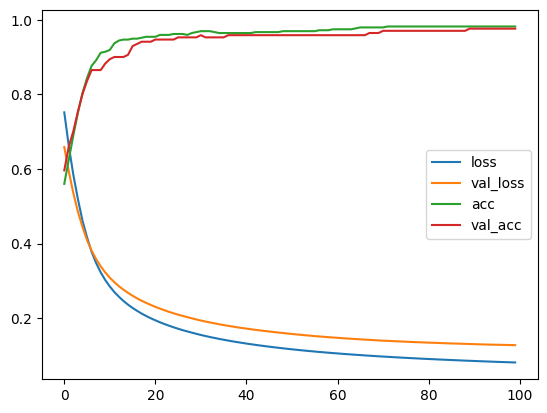

In [90]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend();